# クラスタリング
+ 非階層型クラスタリング
  + K-means法
+ 階層型クラスタリング
  + ウォード法

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('4-2_skill_level.csv', index_col=0)
df.head()

,コミュニケーション,リーダーシップ,プログラミング,ネットワーク知識,セキュリティ知識
A,7,6,9,10,8
B,2,2,4,3,5
C,7,5,6,5,7
D,7,6,10,9,9
E,9,9,3,4,6


In [4]:
from sklearn.decomposition import TruncatedSVD

# Kmeans

In [28]:
from sklearn.cluster import KMeans
vec = KMeans(n_clusters=4, max_iter=1000)
group_num = vec.fit_predict(df)

> 何グループに分けるのかは人間が指定

> 実行の度に結果が変わる

In [29]:
df_calc = df.copy()
df_calc['グループ名'] = group_num
df_calc.groupby('グループ名').mean()

,コミュニケーション,リーダーシップ,プログラミング,ネットワーク知識,セキュリティ知識
グループ名,,,,,
0,9.000000,9.25,6.250000,6.750000,8.000000
1,2.333333,2.00,4.333333,4.000000,3.666667
2,6.666667,6.00,9.333333,9.333333,8.333333
3,5.000000,4.00,6.200000,6.200000,6.400000


+ グループ0に属している人はITスキルが強い、ということが分かる

> 二次元上に写せたら見やすい

In [30]:
model_svd = TruncatedSVD(n_components=2)
vector = model_svd.fit_transform(df)

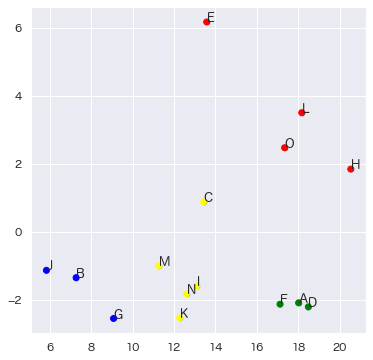

In [31]:
X = vector[:, 0]
Y = vector[:, 1]

sns.set(font='Hiragino Maru Gothic Pro')
plt.figure(figsize=(6, 6))
sns.scatterplot(x=X, y=Y)

#色を付ける
color_codes = {0:"red", 1:"blue", 2:"green", 3:"yellow"}
colors = [color_codes[i] for i in group_num]
plt.scatter(X, Y , color=colors)

for i, (x_i, y_i) in enumerate(zip(X, Y)):
    plt.annotate(df.index[i], (x_i, y_i))
plt.show()

> 近いところは近い色